# Predicting Pet Insurance Claims - EDA

## 1 Introduction

### 1.1 Background
Whenever a pet insurance policy holder incurs veterinary expenses related to their enrolled pet, they can submit claims for reimbursement, and the insurance company reimburses eligible expenses. To price insurance products correctly, the insurance company needs to have a good idea of the amount their policy holders are likely to claim in the future. 

### 1.2 Project Goal
The goal of this project is to create a machine learning model to predict how much (in dollars) a given policy holder will claim for during the second year of their policy. 

### 1.3 Initial Questions for EDA
Below are a few initial questions to answer and areas of interest for the detailed data analysis.
* What patterns or relationships exist between 'Species' and amounts claimed?
* What is the distribution of our claims amounts by year?
* Does EnrollPath factor in to claims amounts in a meaningful way or should it be dropped?
* Is there a connection between PetAge and number or amount of claims?
* What patterns or relationships exist between 'Breed' and amounts claimed?


## 2 Setup

### 2.1 Imports

In [76]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### 2.2 Data Load & Preview

In [2]:
# Read in the data file generated during data wrangling
df = pd.read_csv('../data/merged_pets.csv')

# Preview
df.head()

,PetId,Species,Breed,Premium,Deductible,EnrollPath,AgeYr1,YoungAge,MixedBreed,AmtClaimsYr1,AmtClaimsYr2,AvgClaimsYr1,AvgClaimsYr2,NumClaimsYr1,NumClaimsYr2,AmtClaimsTotal,AvgClaimsTotal,NumClaimsTotal
0,0,Dog,Schnauzer Standard,84.54,200,Web,3,0,0,0.00,1242.00,0.000000,621.000,0,2,1242.00,621.000000,2
1,1,Dog,Yorkiepoo,50.33,500,Phone,0,0,0,0.00,0.00,0.000000,0.000,0,0,0.00,0.000000,0
2,2,Dog,Mixed Breed Medium,74.00,500,Phone,0,0,1,640.63,1187.68,213.543333,237.536,3,5,1828.31,451.079333,8
3,3,Dog,Labrador Retriever,57.54,500,Phone,0,0,0,0.00,0.00,0.000000,0.000,0,0,0.00,0.000000,0
4,4,Dog,French Bulldog,60.69,700,Web,0,0,0,7212.25,168.75,801.361111,168.750,9,1,7381.00,970.111111,10


## 3 Data Analysis
Now that our data file is loaded up, let's start digging into the analysis. As a first step, we'll look at our count of pets per species. With that as our jumping off point, we can start investigating our first question above to see if and how species factors into insurance costs.

### 3.1 What is the count of pets per species?

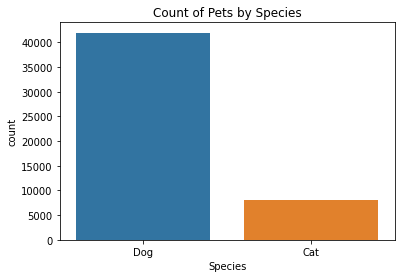

In [3]:
# Plot a count of each species
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.countplot(x='Species', data=df).set(title="Count of Pets by Species")
plt.show()

As observed above, we have approximately 50,000 pets in our data, roughly 85% of which are dogs. The remaining 15% are cats, so that keeps things fairly simple as we only have two breeds to compare. 

Why do we see such a big discrepency in the number of dogs vs. the number of cats?

It could mean that dogs are a more popular option for a pet, or it could mean that dogs are more expensive to keep healthy and insurance is needed. If that's the case, we should see dogs having higher premiums and/or higher deductibles. Let's plot the two and take a look at how the breeds stack up.

### 3.2 Do dog owners pay higher premiums or have higher deductibles than cat owners?

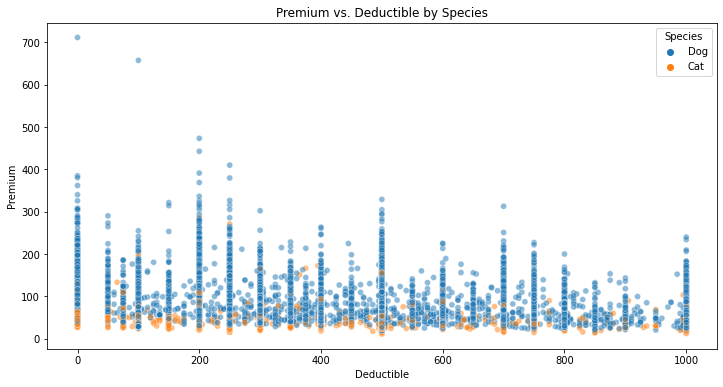

In [4]:
# Create a scatter plot showing premiums and deductibles by species
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.scatterplot(x='Deductible', y='Premium', data=df, hue='Species', 
               alpha=0.5).set(title="Premium vs. Deductible by Species")
plt.show()

It does look like dog owners pay higher premiums in general as we see cats tend to be grouped at the lower end of the premium range for each deductible. Let's try breaking these up to see if we get a better look. And, to take it a step further, we can incorporate pet age as the size of our points to see if age factors into the premium and deductible data.

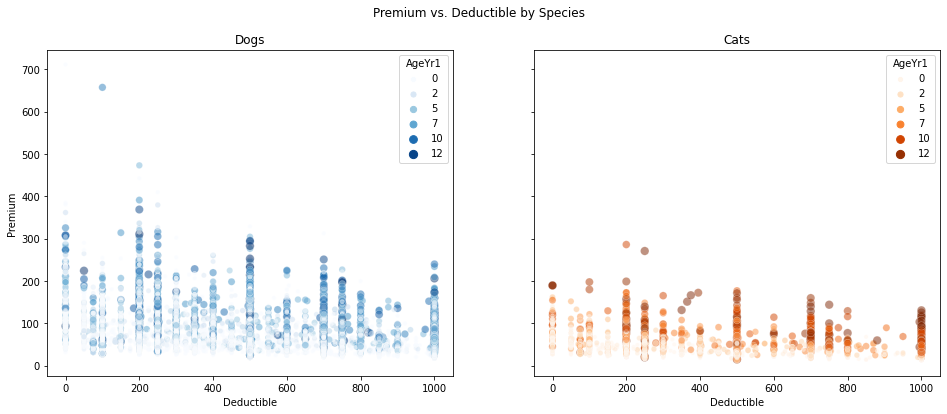

In [5]:
# Create news dfs per species
cats = df[df.Species == 'Cat'].copy()
dogs = df[df.Species == 'Dog'].copy()

# Create scatter plots showing premiums and deductibles by species
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.scatterplot(x='Deductible', y='Premium', data=dogs, hue="AgeYr1", size="AgeYr1", palette="Blues",
                ax=ax1, alpha=0.5).set(title="Dogs")

sns.scatterplot(x='Deductible', y='Premium', data=cats, hue="AgeYr1", size="AgeYr1", palette="Oranges",
                ax=ax2, alpha=0.5).set(title="Cats")
plt.suptitle("Premium vs. Deductible by Species")
plt.show()

For both species, we see clusters at the bottom of the premium range. It does look like dogs tend to have more variance in premium amounts and also have a higher upper range at just about every deductible level.

One interesting observation is that premiums don't appear to go down consistently as deductibles go up. This seems counterintuitive and we should spend more time investigating later on. 

Looking at age, no trends jump out in this view and it doesn't seem that age factors in much to premium and deductible amounts. Perhaps Breed plays a factor and we can look into this when we get into a deeper analysis on breed.

Before we move on, let's take another look at age and see if we can see any trends for premiums or deductible by species.

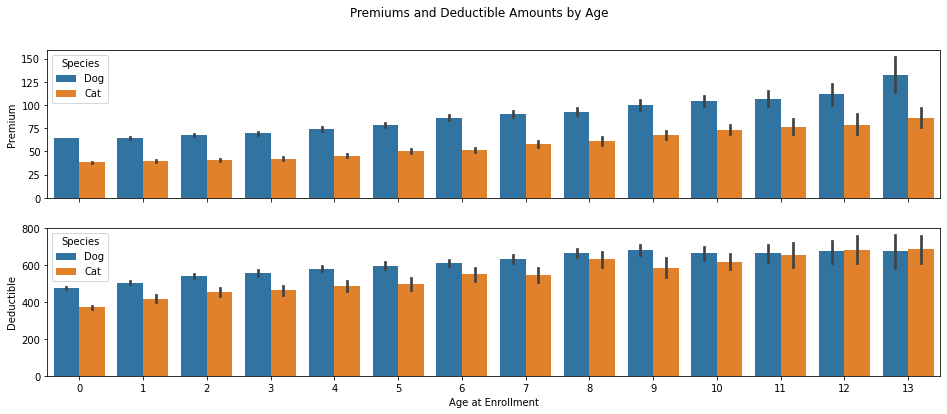

In [6]:
# Create a nested barplot showing total claims by Age and Species
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)
sns.barplot(x="AgeYr1", y="Premium", data=df, hue="Species",
            ax=ax1).set(title="", xlabel="", ylabel="Premium")
sns.barplot(x="AgeYr1", y="Deductible", data=df, hue="Species",
            ax=ax2).set(title="", xlabel="Age at Enrollment", ylabel="Deductible")
plt.suptitle("Premiums and Deductible Amounts by Age")
plt.show()

This plot provides a better look at the relationship between age and the premium and deductible amounts. For premiums, we see that dog owners tend to pay more than cat owners at just about every age level. The trend is similar for deductible amounts, although not as dramatic. We also see that deductible amounts for cats tend to surpass those for dogs in the upper end of the age register. 

#### 3.2.1 Summary
Before we move on, let's summarize our key points so far:
* We have two species in our data, dogs and cats, with dogs making up roughly 85% of the entries
* Cats and dogs both have a broad range of premiums and deductibles with quite a bit of overlap 
* Dogs have a greater range of premiums on the high end at each deductible amount
* Premiums do not consistently go down as deductibles go up
* Premiums and deductible amounts trend upward as pet age increases
* Dog owners tend to pay higher premiums at all age levels

So we are starting to see a picture here that *generally*, dogs are more expensive than cats. Let's see if that relationship extends to our claims data as well.

### 3.3 Are dogs more expensive that cats?
Above, we observed that dog owners *generally* pay higher insurance premiums than cat owners. Intuitively, that should mean that dog owners have higher claims amounts than cat owners. Let's take a look.

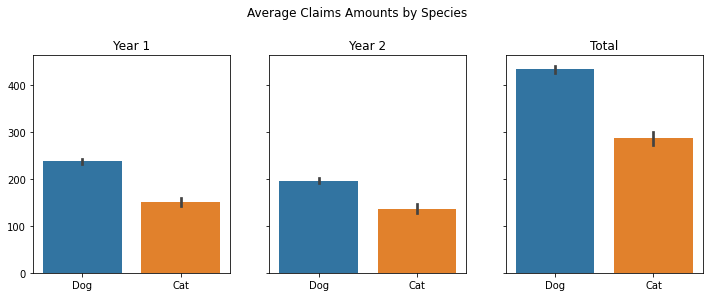

In [7]:
# Plot average total of claims amounts by year and species
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
sns.barplot(x="Species", y="AvgClaimsYr1", data=df, ax=ax1).set(title="Year 1", xlabel="", ylabel="")
sns.barplot(x="Species", y="AvgClaimsYr2", data=df, ax=ax2).set(title="Year 2", xlabel="", ylabel="")
sns.barplot(x="Species", y="AvgClaimsTotal", data=df, ax=ax3).set(title="Total", xlabel="", ylabel="")
plt.suptitle("Average Claims Amounts by Species", y=1.05)
plt.show()

Based on the above, it seems like we can draw the conclusion that on average, dogs are more expensive that cats when it comes to average claims. This could be due to a small number of dogs with high claims or it could be an overall trend. Let's take a look at the relationship between number of claims and amount of claims to see how this relationship differs by species.

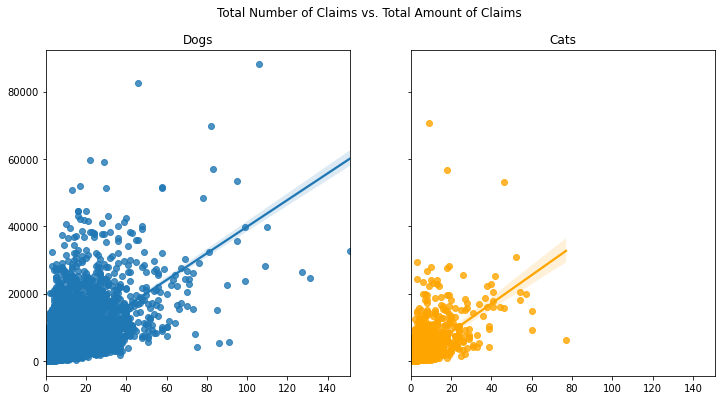

In [8]:
# Create a regression plot for Total Number of Claims vs. Total Amount of Claims by Species
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True, sharex=True)
sns.regplot(x="NumClaimsTotal", y="AmtClaimsTotal", data=dogs,
            ax=ax1).set(title="Dogs", xlabel="", ylabel="")
sns.regplot(x="NumClaimsTotal", y="AmtClaimsTotal", data=cats, color="orange",
            ax=ax2).set(title="Cats", xlabel="", ylabel="")
plt.suptitle("Total Number of Claims vs. Total Amount of Claims")
plt.show()

Based on the regression plot above, it doesn't appear that there is much difference between cats and dogs in terms of the relationship between number of claims and total claims. We do see that generally speaking, as the number of claims goes up, so does the total amount of claims. This feels like a pretty obvious conclusion, but good to confirm it.

There are definitely more dogs with higher numbers of claims and with higher claims amounts, but this seems to be due mostly to the fact that we have so much more data for dogs. As a next step, let's take a look at the distributions of total claims amounts by species.

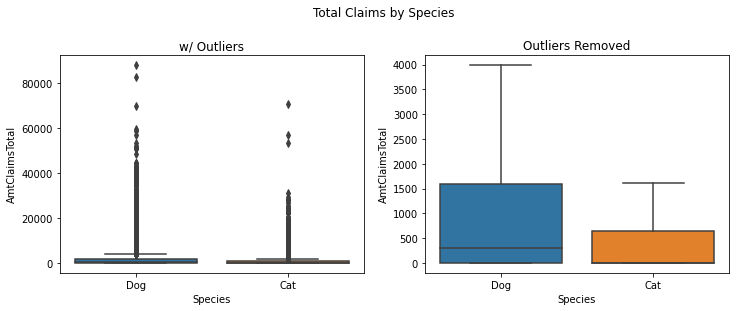

In [9]:
# Create boxplot showing the distribution of claims totals by species
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x="Species", y="AmtClaimsTotal", data=df, ax=ax1).set(title = "w/ Outliers")
sns.boxplot(x="Species", y="AmtClaimsTotal", data=df, ax=ax2, sym="").set(title = "Outliers Removed")
plt.suptitle("Total Claims by Species", y=1.05)
plt.show()

The above plots tells a pretty compelling story. After removing outliers, the entire distribution of claims totals for cats fits within the first 75% of the distribution for dogs. And the remaining 25% of claims totals for dogs covers a spread nearly twice as big as the entire range for cats.

In both plots, it appears that our median claims value is either at or near \\$0 for both species. before we move on, let's look at the number of pets with no claims for each species.

In [77]:
# Calculate percentage of pets with no claims by species
pct_dogs_no_claims = dogs[dogs.AmtClaimsTotal == 0]["PetId"].count() / dogs["PetId"].count() * 100
pct_cats_no_claims = cats[cats.AmtClaimsTotal == 0]["PetId"].count() / cats["PetId"].count() * 100

print("Percentage of pets with no claims:")
print("Dogs - " + str(round(pct_dogs_no_claims, 2)) + "%")
print("Cats - " + str(round(pct_cats_no_claims, 2)) + "%")

Percentage of pets with no claims:
Dogs - 42.38%
Cats - 58.01%


So based on this, it appears dogs are ~15% more likely to have some amount of claims greater than 0 when compared with cats.  

**Summary**
* Dogs have higher claims totals on average vs. cats
* Number and amount of claims is highly variable regardless of species (but follows a similar trend for both)
* Dogs have a wider distribution of claims amounts than do cats, although both species have some pretty significant outliers
* Dog owners are more likely to submit claims (at least in the first two years of having insurance)

**Conclusion**
Species does appear to be a factor in claims amounts and we should consider accounting for this in the  predictive model possibly by separating our pets based on species.

Next, let's take a look at enroll path to determine if this matters at all for our analysis.

### 3.4 Does enroll path tell us anything about pet claims?
Intuitively, it's probably safe to say no. But it could be the case that enroll path tells us something about the pet owners that translates into more or fewer claims. Let's start by looking at a count of pets in each category.

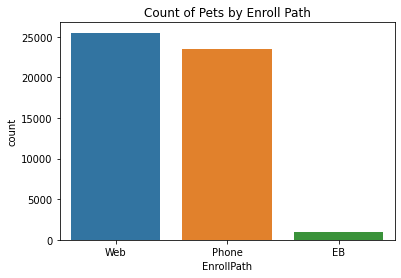

In [11]:
# Plot a count of pets in each enroll path
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.countplot(x='EnrollPath', data=df).set(title="Count of Pets by Enroll Path")
plt.show()

It looks like we have 3 possibilities, Web, Phone and EB. It's unclear what "EB" stands for, but luckliy that is a pretty small percentage of our data. The majoirity of pets were enrolled by either Web or Phone.

Since claims amounts are the focus of this project, let's see if there is any noticeable difference in number or amount of claims related to enroll path. If not, it's probably safe for us to drop this column.

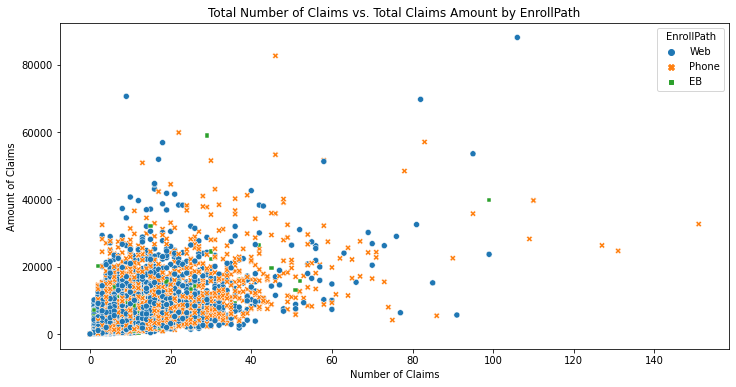

In [12]:
# Create a scatter plot showing number and amount of claims by enroll path
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.scatterplot(x="NumClaimsTotal", y="AmtClaimsTotal", data=df, hue="EnrollPath",
                style="EnrollPath").set(title="Total Number of Claims vs. Total Claims Amount by EnrollPath")
plt.xlabel("Number of Claims")
plt.ylabel("Amount of Claims")
plt.show()

It's difficult to draw any meaningful conclusions from the scatter plot above. Let's add a regression line for each to see if it provides a more meaningful perspective. 

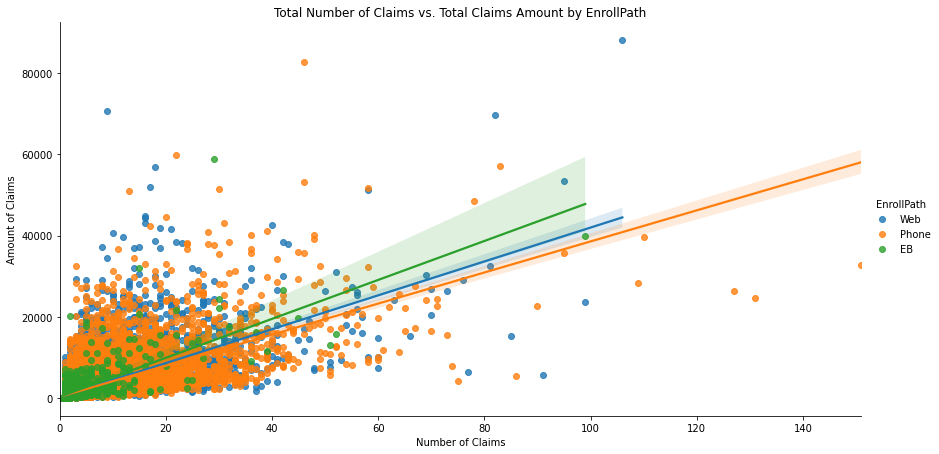

In [13]:
# Create a scatter plot showing number and amount of claims by enroll path
sns.lmplot(x="NumClaimsTotal", y="AmtClaimsTotal", hue="EnrollPath", data=df, height=6, aspect=2
          ).set(title="Total Number of Claims vs. Total Claims Amount by EnrollPath",
               xlabel="Number of Claims", ylabel="Amount of Claims");

Adding the regression lines is helpful in drawing a few conclusions:
* The EB enroll path tends to have a higher variance than either Web or Phone
* The range in number of claims is a bit wider for owners who enrolled by phone (but only due to a handful of data points)
* All enroll paths seem to top out around the same point with respect to total amount of claims (~\\$40-55k)

In general though, it looks like the distribution of claims (Number and Amount) may be similar for each enroll path. Let's take a look at our distribution for each enroll path before we make the decision about dropping it.

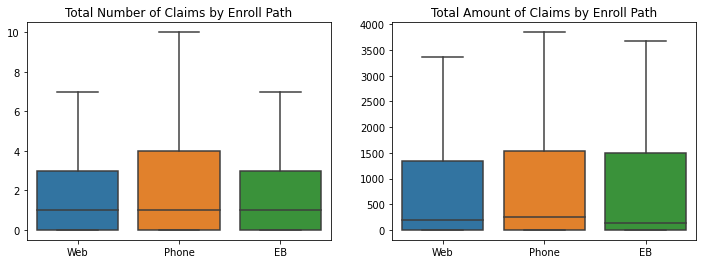

In [14]:
# Create box plots showing distribution of number and amount of claims by enroll path
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x="EnrollPath", y="NumClaimsTotal", data=df, ax=ax1,
            sym="").set(title = "Total Number of Claims by Enroll Path", xlabel="", ylabel="")
sns.boxplot(x="EnrollPath", y="AmtClaimsTotal", data=df, ax=ax2,
            sym="").set(title = "Total Amount of Claims by Enroll Path", xlabel="", ylabel="")
plt.show()

While we do see some slight variation in the plots above, it doesn't seem to be significant enough to draw the conclusion that enroll path has an affect on number or amount of claims. Given this, we'll drop that column and move on.

In [15]:
# Drop EnrollPath
df = df.drop(columns=["EnrollPath"])

### 3.5 Does age factor into claims amounts?
This also seems obvious, but let's take a look at how the claims totals break down by Species and Age.

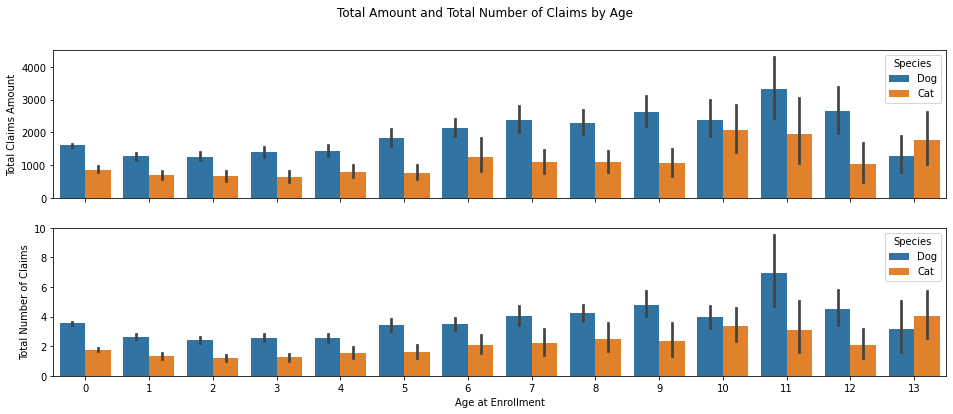

In [16]:
# Create a nested barplot showing total claims by Age and Species
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 6), sharex=True)
sns.barplot(x="AgeYr1", y="AmtClaimsTotal", data=df, hue="Species",
            ax=ax1).set(title="", xlabel="", ylabel="Total Claims Amount")
sns.barplot(x="AgeYr1", y="NumClaimsTotal", data=df, hue="Species",
            ax=ax2).set(title="", xlabel="Age at Enrollment", ylabel="Total Number of Claims")
plt.suptitle("Total Amount and Total Number of Claims by Age")
plt.show()

In [17]:
## TODO - Consider additional Age related plots
## - facetgrid histogram of number of claims by age

This is an interesting perspective. The amount and number of claims for dogs exceed those for cats by a considerable margin at every age along the spectrum even spiking a bit at age 11. The exception to this is for the oldest age in our dataset (13) where cats surpass dogs in both categories. In addition, the confidence interval on the claims data is generally increasing in proportion to pet age. Intuitively this makes sense given that we would expect to see a greater variance in healthcare costs as pets age.

**Conclusion:**
* Age matters when it comes to claims amounts, but it doesn't seem to follow a straighforward linear trajectory.

### 3.6 How many pets have claims in one or both years?
Earlier in our analysis of species, we observed that a significant number of pets have no claims at all within the first two years. But what about the other pets... do the majority have claims in both years or only one year? Additionally, are there any patterns that jump out when we look at pets with claims in both years in terms of age, species, etc.?

In [60]:
# Create function to populate new column as count of number of years with claims (0, 1, 2)
def claim_yrs(row):
    if (row["NumClaimsTotal"] == 0):
        return 0
    elif ((row["NumClaimsYr1"] > 0) & (row["NumClaimsYr2"] > 0)):
        return 2
    else:
        return 1

# Apply function to df to create new column
df["ClaimYrs"] = df.apply(claim_yrs, axis=1)

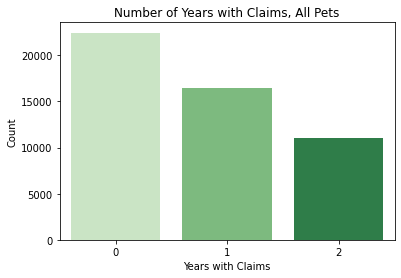

In [74]:
# Plot the count of each possibility in ClaimYrs
fig, ax = plt.subplots(1, 1, figsize=(6, 4), sharey=True)
sns.countplot(x='ClaimYrs', data=df, palette='Greens').set(title="Number of Years with Claims, All Pets", 
                                         xlabel="Years with Claims", ylabel="Count")
plt.show()

This confirms our earlier calculations regarding the number of pets with no claims at all (58% for cats and 45% for dogs), but it's also interesting to see the number of pets with claims in one or both years.

Let's take a different view and see how this looks in terms of average number of years with claims by pet age and species.

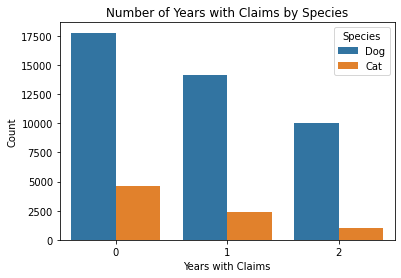

In [62]:
# Plot count of pets with claims in 0, 1, or 2 years by species
f, ax = plt.subplots(1, 1, figsize=(6, 4))
sns.countplot(x="ClaimYrs", hue="Species", data=df,
              ax=ax).set(title="Number of Years with Claims by Species",
                         xlabel="Years with Claims", ylabel="Count")
plt.show()

Looking at the breakdown by species, the trends looks to be similar for cats and dogs. It's hard to be certain in this view due to the unbalanced nature of the data (85% dogs and 15% cats). To get a better look, we can plot the data so that we see the average number of years with claims by species. And to make it more interesting, we can add the dimension of age as well.

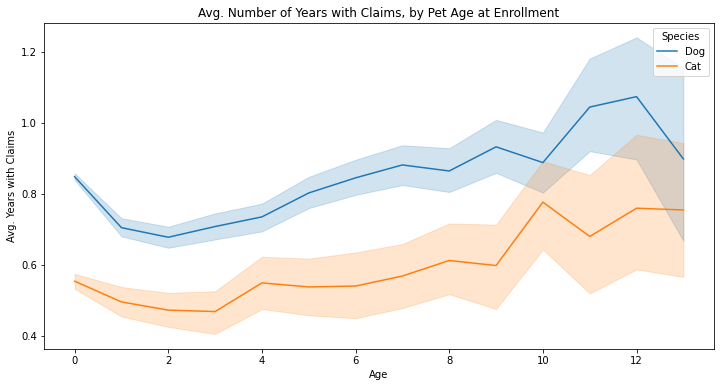

In [75]:
# Create line plot to show the average number of years with claims by age and species
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.lineplot(x="AgeYr1", y="ClaimYrs", hue="Species",
             data=df).set(title="Avg. Number of Years with Claims, by Pet Age at Enrollment",
                          ylabel="Avg. Years with Claims", xlabel="Age")
plt.show()

In the plot above, we see there is a clear trend that on average, dogs have more years with claims than cats. We can also see that the trend follows a similar pattern across ages in both species - starting out slightly elevated, then settling down and slowly trending upwards with age. The confidence interval also indicates that there is less variability in the number of years with claims for young pets and that the variability increases with age.

**Summary**
* Around one half of pets in both species have no claims at all
* In general, dogs tend to have more claims than cats
* The variability of number of years with claims increases for both species in a way that corresponds to age

# Start Here - DRAFT ONLY BELOW THIS LINE

## Some other things to look into...
1. Breed patterns related to claims (number and amount)
1. Dogs tend to be enrolled at a younger age by nearly a year on average
2. The averages for claims data (i.e., number of claims, average claim amount, and total claims amount) is higher for dogs across the board and in some cases, is as much as 2x higher than for cats.
3. Claims differences between species - Since the focus of this study is on claims amounts, we'll focus on claims-related categories for now. The difference in the average claims amounts between cats and dogs in year one appears to be significant with dogs (\\$867) at more than 2x higher than cats (\\$433). And in year 2, the average for dogs (\\$739) is not quite 2x the average for cats (\\$445), but it's close.

### 3.7 Does breed factor into claims amounts in a significant way?

* Does it make sense to look at the proportion of a breed with high claims and see if any of the breeds stand out?
* Should I only pay attention to this is the breeds in question have a count of pets higher than some significant number (e.g., 30)?

#### Cat breeds
Since we only have ~35 total cat breeds, we can take a quick look at a rollup of claims data for all breeds to help guide next steps.

In [96]:
# # Group cats by breed and aggregate claims data columns
# cats_by_breed = cats.groupby('Breed').agg({'PetId': ['count'],
#                                            'NumClaimsYr1':['mean'],
#                                            'NumClaimsYr2':['mean'],
#                                            'AmtClaimsYr1':['mean', 'median', 'min', 'max'], 
#                                            'AmtClaimsYr2':['mean', 'median', 'min', 'max']}
#                                          )
# # View result
# cats_by_breed

### Initial observations on cat breeds
* The number of cats for each breed covers a wide range, from 1 pet for certain breeds to 3511 for the most common breed. 
* Some breeds with a low count have 0 claims (e.g., American Wirehair and Chartreux), while others have very high claims (e.g., Selkirk Rex). 
* The most common values for median and minimum claims amounts is \\$0. This matches up with what we observed earlier on in the analysis and will likely factor in to the final predictions.

TODO for conclusions - will need to pick a count that is reasonable and then group breeds below that count into an "Other" category.

In [83]:
# Preview number of cat breeds with a count of pets greater than 30
# cats_by_breed[cats_by_breed['PetId']['count'] >= 30]['PetId']['count'].sort_values(ascending=False)

In [82]:
# Preview full result
# cats_by_breed[cats_by_breed['PetId']['count'] >= 30].sort_values([('AmtClaimsYr2', 'mean')], ascending=False)

In [ ]:
# # Preserve list of Breeds with count greater equal to 30
# cat_breeds = cats_by_breed[cats_by_breed['PetId']['count'] >= 30].index.to_list()

# # cats_by_breed.reset_index(inplace=True)

# # Group breeds as 'Other' if count less than 30

In [97]:
# x = cats_by_breed[cats_by_breed['PetId']['count'] >= 30].index
# y1 = cats_by_breed[cats_by_breed['PetId']['count'] >= 30][('AmtClaimsYr1', 'mean')]
# y2 = cats_by_breed[cats_by_breed['PetId']['count'] >= 30][('AmtClaimsYr2', 'mean')]

# plt.figure(figsize=(10,6))
# # _ = plt.barh([y1,y2], stacked=True, width=1.0)
# cats_by_breed[cats_by_breed['PetId']['count'] >= 30][[('AmtClaimsYr1', 'mean'),('AmtClaimsYr2', 'mean')]].plot(kind='barh', stacked=True)

# plt.gca().invert_yaxis()
# plt.show()

In [ ]:
###########
# TODO
##########
# View distribution of average claims by cat breed (below seems like it would work for dogs as well)
## Maybe a scatter plot - each breed is a point plotted based on avg total num claims and avg total amount claims 
## Scatter plot circle size based on count of breed
# Group cat breeds with fewer than 20 or 30 representative cats (unless it seems there is a significant difference maybe?? how to do this?)

In [ ]:
# breed_counts = cats_by_breed['NumClaimsTotal', 'count']
# breed_num_claims = cats_by_breed['NumClaimsTotal', 'mean']
# breed_amt_claims = cats_by_breed['AmtClaimsTotal', 'mean']

# plt.figure(figsize=(10,6))
# _ = sns.scatterplot(data=cats_by_breed, x=breed_num_claims, y=breed_amt_claims, 
#                     size=breed_counts, sizes=(20, 200), legend=False)
# plt.show()

In [ ]:
# cats_by_breed = cats_by_breed[cats_by_breed['AmtClaimsTotal', 'mean'] < 2000]

In [ ]:
# breed_counts = cats_by_breed['NumClaimsTotal', 'count']
# breed_num_claims = cats_by_breed['NumClaimsTotal', 'mean']
# breed_amt_claims = cats_by_breed['AmtClaimsTotal', 'mean']

# plt.figure(figsize=(10,6))
# _ = sns.scatterplot(data=cats_by_breed, x=breed_num_claims, y=breed_amt_claims, 
#                     hue=breed_counts, size=breed_counts, sizes=(20, 200), legend=True)

# plt.xlabel('Avg Total Number of Claims')
# plt.ylabel('Avg Total Amount of Claims')
# plt.title('Average Claims by Breed')
# # _._legend.set_title('Count of Breed')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.5, title="Count of Breed")

# plt.show()

### 3.8 Is there any significant correlation between claims in year 2 and our other features?

TODO - Explain why I am filtering down to a subset of features

In [94]:
# Filter species dfs down the a subset of features
cols = ['Premium', 'Deductible', 'AgeYr1', 'YoungAge', 'MixedBreed', 'AmtClaimsYr1',
             'AvgClaimsYr1', 'NumClaimsYr1', 'AmtClaimsYr2']
cats_filtered = cats[cols]
dogs_filtered = dogs[cols]

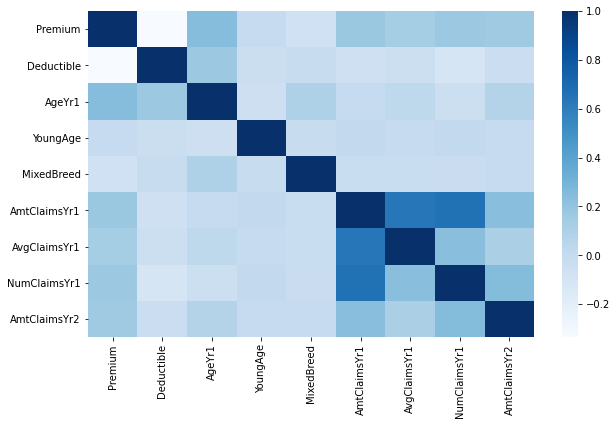

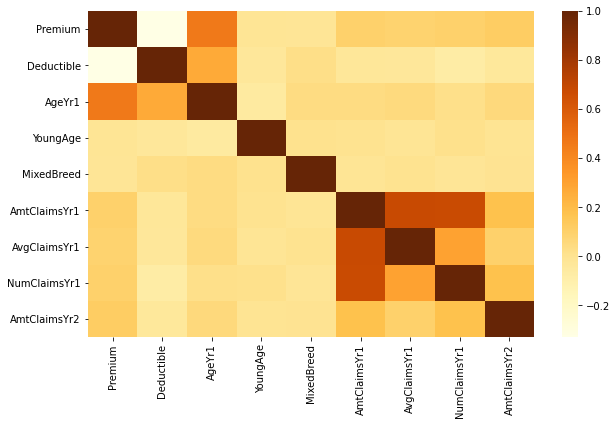

In [95]:
# Create correlation matrices
cats_corr = cats_filtered.corr()
dogs_corr = dogs_filtered.corr()

# Plot the corresponding heatmaps
plt.figure(figsize=(10,6))
_ = sns.heatmap(dogs_corr, cmap="Blues")
plt.show()

plt.figure(figsize=(10,6))
_ = sns.heatmap(cats_corr, cmap="YlOrBr")
plt.show()

## TODO
* Conclusions about correlation matrix
* Overall summary of and key takeaways
* Clean up data for next step and write to new file
* Initial thoughts about pre-processing and/or predictive model